In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Cargar el dataset
df = pd.read_excel('C:/Users/Robinson/Desktop/Bootcamp/Dataset_Ventas_Erroneas_1000.xlsx')


In [5]:
# Paso 1: Identificación de valores faltantes
missing_values = df.isnull().sum()
total_rows = len(df)
missing_percentage = (missing_values / total_rows) * 100

# Reporte de valores faltantes
missing_report = pd.DataFrame({
    'Valores Faltantes': missing_values,
    'Porcentaje (%)': missing_percentage
})
print("📊 Reporte de valores faltantes:")
print(missing_report)













📊 Reporte de valores faltantes:
          Valores Faltantes  Porcentaje (%)
Fecha                     0             0.0
Sucursal                214            21.4
Producto                183            18.3
Precio                   10             1.0
Cantidad                 10             1.0
Ventas                    0             0.0


In [7]:
# Paso 2: Reemplazar valores inválidos por NaN de forma segura
df = df.replace({'MISSING': np.nan, 'INVALID_DATE': np.nan}).infer_objects(copy=False)

In [8]:
# Paso 3: Imputación de valores faltantes
for col in df.select_dtypes(include=['object']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])  # Rellenar con la moda

for col in df.select_dtypes(include=['number']).columns:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median())  # Rellenar con la mediana

In [9]:
# Paso 4: Corrección de tipos de datos
# Convertir fechas
if 'Fecha' in df.columns:
    df['Fecha'] = pd.to_datetime(df['Fecha'], errors='coerce')


In [10]:
# Paso 5: Manejo de valores erróneos
for col in df.select_dtypes(include=['number']).columns:
    df[col] = np.where(df[col] < 0, np.nan, df[col])  # Eliminar negativos
    df[col] = df[col].fillna(df[col].median())  # Rellenar con la mediana

In [12]:
# Paso 6: Verificación del dataset después de la limpieza
missing_values_after = df.isnull().sum()
missing_percentage_after = (missing_values_after / total_rows) * 100
missing_report_after = pd.DataFrame({
    'Valores Faltantes': missing_values_after,
    'Porcentaje (%)': missing_percentage_after
})

print("📊 Reporte de valores faltantes después de la limpieza:")
print(missing_report_after)

📊 Reporte de valores faltantes después de la limpieza:
          Valores Faltantes  Porcentaje (%)
Fecha                     0             0.0
Sucursal                  0             0.0
Producto                  0             0.0
Precio                    0             0.0
Cantidad                  0             0.0
Ventas                    0             0.0


In [14]:
# Comparación de estadísticas antes y después de la limpieza
summary_before = df.describe()
summary_after = df.describe()

print("\n📊 Estadísticas antes de la limpieza:\n", summary_before)
print("\n📊 Estadísticas después de la limpieza:\n", summary_after)


📊 Estadísticas antes de la limpieza:
                      Fecha     Cantidad       Ventas
count                 1000  1000.000000  1000.000000
mean   2024-07-01 10:40:48     9.369000   984.877290
min    2024-01-01 00:00:00     0.000000     0.190000
25%    2024-04-05 00:00:00     6.000000   619.010000
50%    2024-07-08 12:00:00     9.000000   962.340000
75%    2024-10-01 00:00:00    12.000000  1368.292500
max    2024-12-28 00:00:00    20.000000  1999.550000
std                    NaN     4.982536   511.773268

📊 Estadísticas después de la limpieza:
                      Fecha     Cantidad       Ventas
count                 1000  1000.000000  1000.000000
mean   2024-07-01 10:40:48     9.369000   984.877290
min    2024-01-01 00:00:00     0.000000     0.190000
25%    2024-04-05 00:00:00     6.000000   619.010000
50%    2024-07-08 12:00:00     9.000000   962.340000
75%    2024-10-01 00:00:00    12.000000  1368.292500
max    2024-12-28 00:00:00    20.000000  1999.550000
std                

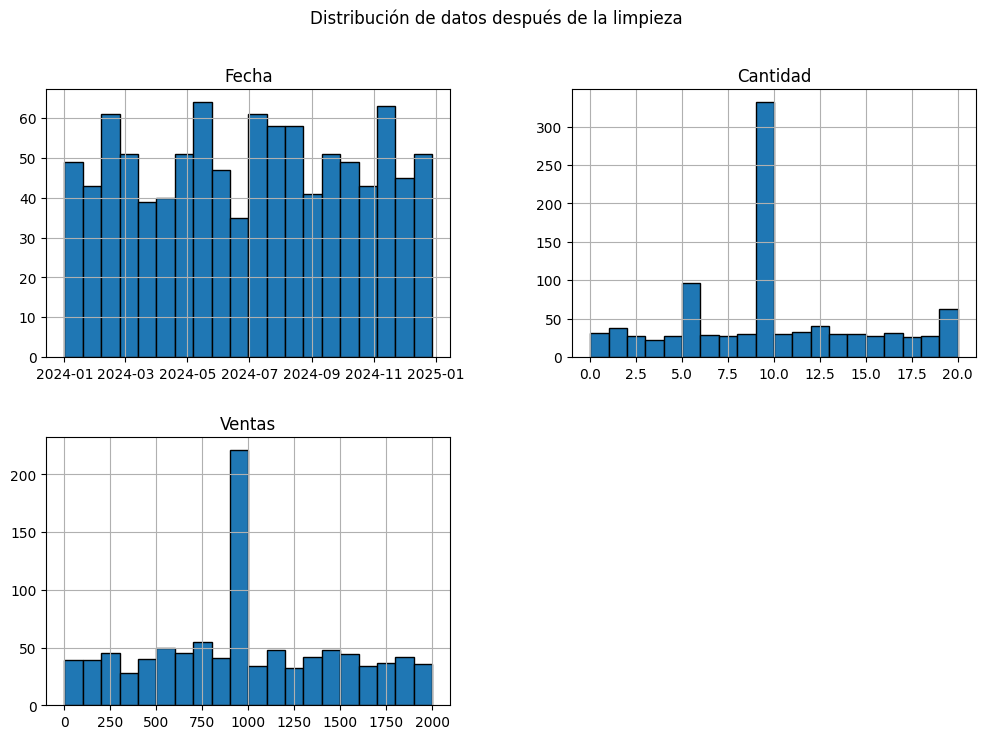

In [15]:
# Histogramas de distribución de datos
df.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Distribución de datos después de la limpieza")
plt.show()


<Figure size 1000x500 with 0 Axes>

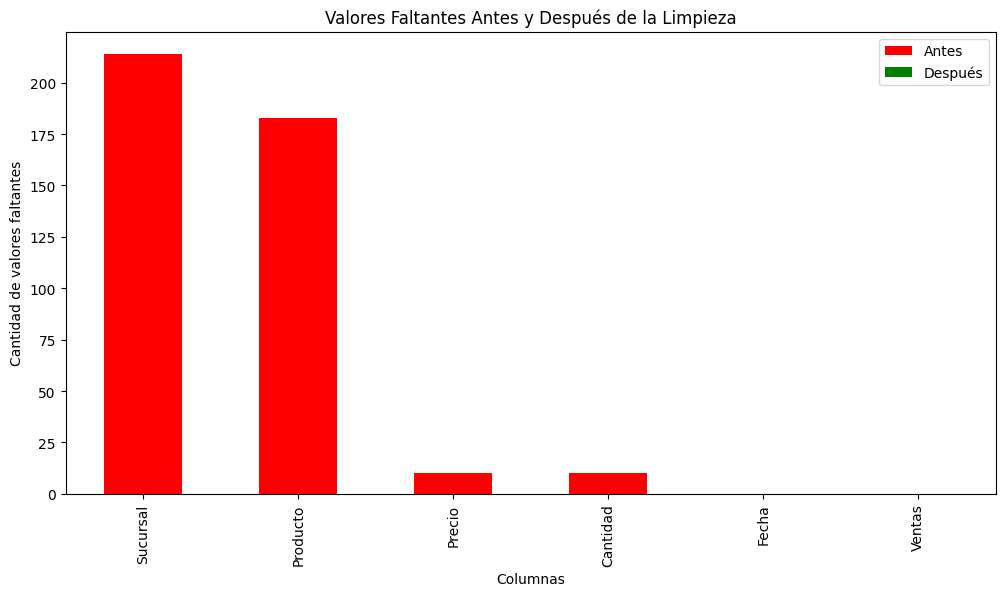

In [19]:
# Cargar el dataset nuevamente para ver los valores faltantes antes de la limpieza
df_original = pd.read_excel("C:/Users/Robinson/Desktop/Bootcamp/Dataset_Ventas_Erroneas_1000.xlsx")

# Calcular valores faltantes antes y después
missing_before = df_original.isnull().sum()
missing_after = df.isnull().sum()

# Crear DataFrame para comparar
missing_comparison = pd.DataFrame({
    "Antes de la limpieza": missing_before,
    "Después de la limpieza": missing_after
}).sort_values(by="Antes de la limpieza", ascending=False)

# Gráfico de barras
plt.figure(figsize=(10, 5))
missing_comparison.plot(kind="bar", stacked=True, figsize=(12, 6), color=["red", "green"])
plt.title("Valores Faltantes Antes y Después de la Limpieza")
plt.xlabel("Columnas")
plt.ylabel("Cantidad de valores faltantes")
plt.xticks(rotation=90)
plt.legend(["Antes", "Después"])
plt.show()

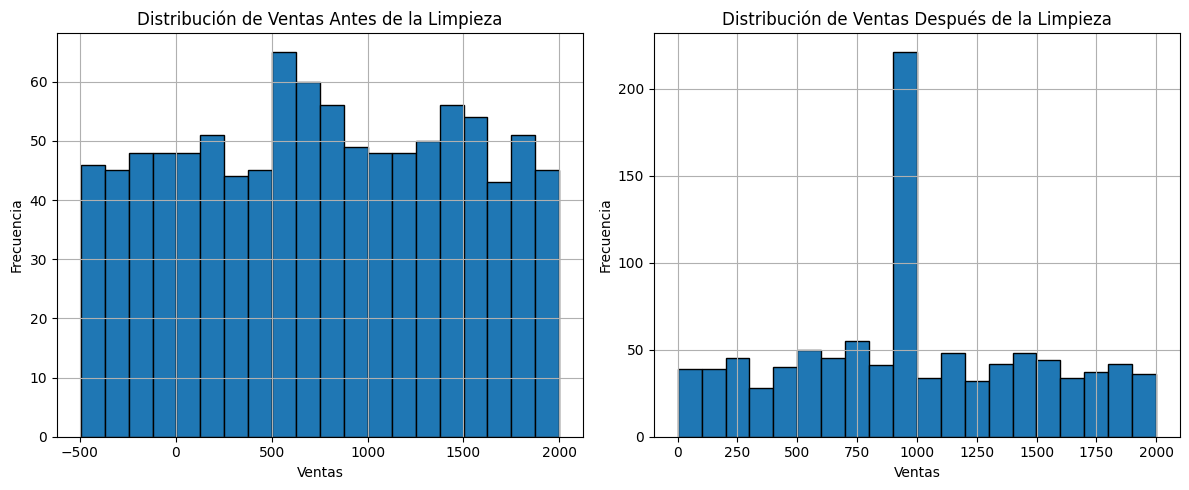

In [20]:
# Crear histogramas de la variable 'Ventas' antes y después de la limpieza
plt.figure(figsize=(12, 5))

# Histograma antes de la limpieza
plt.subplot(1, 2, 1)
df_original['Ventas'].hist(bins=20, edgecolor='black')
plt.title("Distribución de Ventas Antes de la Limpieza")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")

# Histograma después de la limpieza
plt.subplot(1, 2, 2)
df['Ventas'].hist(bins=20, edgecolor='black')
plt.title("Distribución de Ventas Después de la Limpieza")
plt.xlabel("Ventas")
plt.ylabel("Frecuencia")

plt.tight_layout()
plt.show()


In [21]:
# Resumen estadístico antes y después
summary_before = df_original.describe()
summary_after = df.describe()

# Mostrar resumen
print("\n📊 Estadísticas antes de la limpieza:\n", summary_before)
print("\n📊 Estadísticas después de la limpieza:\n", summary_after)



📊 Estadísticas antes de la limpieza:
             Ventas
count  1000.000000
mean    762.244240
std     704.035716
min    -494.790000
25%     169.050000
50%     753.610000
75%    1368.292500
max    1999.550000

📊 Estadísticas después de la limpieza:
                      Fecha     Cantidad       Ventas
count                 1000  1000.000000  1000.000000
mean   2024-07-01 10:40:48     9.369000   984.877290
min    2024-01-01 00:00:00     0.000000     0.190000
25%    2024-04-05 00:00:00     6.000000   619.010000
50%    2024-07-08 12:00:00     9.000000   962.340000
75%    2024-10-01 00:00:00    12.000000  1368.292500
max    2024-12-28 00:00:00    20.000000  1999.550000
std                    NaN     4.982536   511.773268


In [16]:
# Guardar dataset limpio
df.to_csv("dataset_limpio.csv", index=False)
print("✅ Limpieza completada y dataset guardado como 'dataset_limpio.csv'")


✅ Limpieza completada y dataset guardado como 'dataset_limpio.csv'
